DataSet 1

In [51]:
import scipy.io as scipy
import math
import numpy as np
from statistics import mode
import matplotlib.pyplot as plt

mat = scipy.loadmat('grupoDados1.mat')
grupoTeste = mat['grupoTest']
grupoTreino = mat['grupoTrain']
testeRots = mat['testRots'].flatten()
treinoRots = mat['trainRots'].flatten()

In [52]:
def normalizacao(dados):
    min_dados = np.min(dados)
    max_dados = np.max(dados)
    lista = []
    for i in dados:
        lista.append((i - min_dados) / (max_dados - min_dados))
    return lista

def dist(x, y):
    soma = 0
    for i in range(len(x)):
        soma += (x[i] - y[i])**2
    return math.sqrt(soma)

def meuKnn(dadosTreino, rotuloTreino, dadosTeste, k):
    previsoes = []
    for i in range(len(dadosTeste)):
        distancias = []
        for j in range(len(dadosTreino)):
            distancia = dist(dadosTeste[i], dadosTreino[j])
            distancias.append((distancia, rotuloTreino[j]))
        # Ordenar pela distância
        distanciasOrdenadas = sorted(distancias)
        # Selecionar os k vizinhos mais próximos
        vizinhos = [x[1] for x in distanciasOrdenadas[:k]]
        # Rótulo previsto = moda dos vizinhos
        rotulo_pred = mode(vizinhos)
        previsoes.append(rotulo_pred)
    return np.array(previsoes)

# Testando com k=1
rotuloPrevisto = meuKnn(grupoTreino, treinoRots, grupoTeste, 1)

# Acurácia
estaCorreto = rotuloPrevisto == testeRots
numCorreto = np.sum(estaCorreto)
totalNum = len(testeRots)
acuracia = numCorreto / totalNum

print("Teste utilizando k=1")
print("Acurácia:", acuracia)
    
print("\n- - - - - - - - - - - - - - - - \n")

# Testando com k=3
rotuloPrevisto = meuKnn(grupoTreino, treinoRots, grupoTeste, 3)

# Acurácia
estaCorreto = rotuloPrevisto == testeRots
numCorreto = np.sum(estaCorreto)
totalNum = len(testeRots)
acuracia = numCorreto / totalNum

print("Teste utilizando k=3")
print("Acurácia:", acuracia)

print("\n- - - - - - - - - - - - - - - - \n")

# Testando com k=5
rotuloPrevisto = meuKnn(grupoTreino, treinoRots, grupoTeste, 5)

# Acurácia
estaCorreto = rotuloPrevisto == testeRots
numCorreto = np.sum(estaCorreto)
totalNum = len(testeRots)
acuracia = numCorreto / totalNum

print("Teste utilizando k=5")
print("Acurácia:", acuracia)

print("\n- - - - - - - - - - - - - - - - \n")

# Testando com k=7
rotuloPrevisto = meuKnn(grupoTreino, treinoRots, grupoTeste, 7)

# Acurácia
estaCorreto = rotuloPrevisto == testeRots
numCorreto = np.sum(estaCorreto)
totalNum = len(testeRots)
acuracia = numCorreto / totalNum

print("Teste utilizando k=7")
print("Acurácia:", acuracia)

print("\n- - - - - - - - - - - - - - - - \n")

# Testando com k=10
rotuloPrevisto = meuKnn(grupoTreino, treinoRots, grupoTeste, 10)

# Acurácia
estaCorreto = rotuloPrevisto == testeRots
numCorreto = np.sum(estaCorreto)
totalNum = len(testeRots)
acuracia = numCorreto / totalNum

print("Teste utilizando k=10")
print("Acurácia:", acuracia)

Teste utilizando k=1
Acurácia: 0.96

- - - - - - - - - - - - - - - - 

Teste utilizando k=3
Acurácia: 0.98

- - - - - - - - - - - - - - - - 

Teste utilizando k=5
Acurácia: 0.96

- - - - - - - - - - - - - - - - 

Teste utilizando k=7
Acurácia: 0.96

- - - - - - - - - - - - - - - - 

Teste utilizando k=10
Acurácia: 0.94


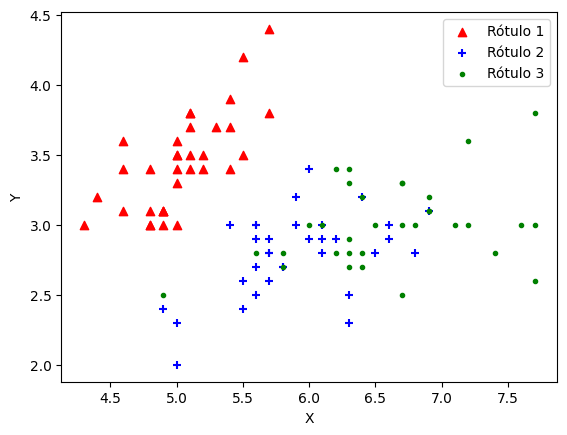

In [53]:
def getDadosRotulo(dados, rotulos, rotulo, indice):
    ret = []
    for idx in range(0, len(dados)):
        if(rotulos[idx] == rotulo):
            ret.append(dados[idx][indice])        
    return ret

def visualizaPontos(dados, rotulos, d1, d2):
    fig, ax = plt.subplots() 
    ax.scatter(getDadosRotulo(dados, rotulos, 1, d1), getDadosRotulo(dados, rotulos, 1, d2), c='red' , marker='^')
    ax.scatter(getDadosRotulo(dados, rotulos, 2, d1), getDadosRotulo(dados, rotulos, 2, d2), c='blue' , marker='+')
    ax.scatter(getDadosRotulo(dados, rotulos, 3, d1), getDadosRotulo(dados, rotulos, 3, d2), c='green', marker='.')
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.legend(['Rótulo 1', 'Rótulo 2', 'Rótulo 3'])
    plt.show()

visualizaPontos(grupoTreino, treinoRots, 0, 1)

Grupo de Dados 1:
O grupoDados1 é um conjunto de dados de flores. Para mais informações consulte: http://archive.ics.uci.edu/ml/datasets/Iris .

Q1.1. Qual é a acurácia máxima que você consegue da classificação?

In [54]:
acuracia = 0
for k in [1, 3, 5, 7, 10]:
    rotuloPrevisto = meuKnn(grupoTreino, treinoRots, grupoTeste, k)

    # Acurácia
    estaCorreto = rotuloPrevisto == testeRots
    numCorreto = np.sum(estaCorreto)
    totalNum = len(testeRots)
    if acuracia < (numCorreto / totalNum):
        acuracia = numCorreto / totalNum
print("Acurácia máxima da classificação:", acuracia)

Acurácia máxima da classificação: 0.98


Q1.2. É necessário ter todas as características (atributos) para obter a acurácia máxima para esta classificação?

Adicionar o TESTE AQUI FAZENDO APENAS COM PETALAS (LARGURA E COMPRIMENTO )E APENAS COM SEPALAS (LARGURA E COMPRIMENTO)

In [55]:
for k in [1, 3, 5, 7, 10]:
    

    # Selecionar apenas as features de sépalas (colunas 0 e 1)
    grupoTreino_sepalas = grupoTreino[:, [0, 1]]
    grupoTeste_sepalas = grupoTeste[:, [0, 1]]

    rotuloPrevisto = meuKnn(grupoTreino_sepalas, treinoRots, grupoTeste_sepalas, 3)

    estaCorreto = rotuloPrevisto == testeRots
    numCorreto = sum(estaCorreto)
    totalNum = len(testeRots)
    acuracia = numCorreto / totalNum

    print(f"Acurácia usando só sépalas (k={k}): {acuracia:.2f}")

    # Selecionar apenas as features de pétala (colunas 2 e 3)
    grupoTreino_petalas = grupoTreino[:, [2, 3]]
    grupoTeste_petalas = grupoTeste[:, [2, 3]]

    rotuloPrevisto = meuKnn(grupoTreino_petalas, treinoRots, grupoTeste_petalas, 3)

    estaCorreto = rotuloPrevisto == testeRots
    numCorreto = sum(estaCorreto)
    totalNum = len(testeRots)
    acuracia = numCorreto / totalNum

    print(f"Acurácia usando só pétalas (k={k}): {acuracia:.2f}")

print("\n- - - - - - - - - - - - - - - - \n")
print("Logo, é necessário ter todas as categorias de features se o objetivo for maximizar a acurácia.")

Acurácia usando só sépalas (k=1): 0.70
Acurácia usando só pétalas (k=1): 0.96
Acurácia usando só sépalas (k=3): 0.70
Acurácia usando só pétalas (k=3): 0.96
Acurácia usando só sépalas (k=5): 0.70
Acurácia usando só pétalas (k=5): 0.96
Acurácia usando só sépalas (k=7): 0.70
Acurácia usando só pétalas (k=7): 0.96
Acurácia usando só sépalas (k=10): 0.70
Acurácia usando só pétalas (k=10): 0.96

- - - - - - - - - - - - - - - - 

Logo, é necessário ter todas as categorias de features se o objetivo for maximizar a acurácia.


DataSet 2 - Classificação de Vinhos

O Grupo de Dados 2 é um problema que visa prever a origem do vinho baseado em seus componentes químicos.

Q2.1: Aplicar k-NN a este problema e verificar a acurácia de classificação.

In [56]:
mat = scipy.loadmat('grupoDados2.mat')
grupoTeste2 = mat['grupoTest']
grupoTreino2 = mat['grupoTrain']
testeRots2 = mat['testRots'].flatten()
treinoRots2 = mat['trainRots'].flatten()

In [57]:
print("=== Q2.1: Testando k-NN no Grupo de Dados 2 (Vinho)\n")

acuracia_maxima = 0
melhor_k = 0
for k in [1, 3, 5, 7, 10]:
    rotuloPrevisto = meuKnn(grupoTreino2, treinoRots2, grupoTeste2, k)

    estaCorreto = rotuloPrevisto == testeRots2
    numCorreto = np.sum(estaCorreto)
    totalNum = len(testeRots2)
    acuracia = numCorreto / totalNum
    
    print(f"k={k}: Acurácia = {acuracia:.4f}")
    
    if acuracia > acuracia_maxima:
        acuracia_maxima = acuracia
        melhor_k = k



=== Q2.1: Testando k-NN no Grupo de Dados 2 (Vinho)

k=1: Acurácia = 0.6833
k=3: Acurácia = 0.6167
k=5: Acurácia = 0.6833
k=7: Acurácia = 0.7333
k=10: Acurácia = 0.7667


In [58]:
def normalizarDados(dados):

    #Normalização Min-Max por coluna transforma cada feature para a escala [0,1].

    for coluna in range(dados.shape[1]):
        minimo = dados[:, coluna].min()
        maximo = dados[:, coluna].max()
        
        if maximo != minimo:
            dados[:, coluna] = (dados[:, coluna] - minimo) / (maximo - minimo)
        else:
            dados[:, coluna] = 0.0
    
    return dados
print("Dados ORIGINAIS:")
print(f"Valores: {grupoTreino2[0]}\n")

grupoTeste2_Normalizado = normalizarDados(grupoTeste2)
grupoTreino2_Normalizado = normalizarDados(grupoTreino2)

print("Dados NORMALIZADO:")
print(f"Valores: {grupoTreino2[0]}\n")

for k in [1, 3, 5, 7, 10]:
    rotuloPrevisto = meuKnn(grupoTreino2_Normalizado, treinoRots2, grupoTeste2_Normalizado, k)

    estaCorreto = rotuloPrevisto == testeRots2
    numCorreto = np.sum(estaCorreto)
    totalNum = len(testeRots2)
    acuracia = numCorreto / totalNum
    
    print(f"k={k}: Acurácia = {acuracia:.4f}")
    
    if acuracia > acuracia_maxima:
        acuracia_maxima = acuracia
        melhor_k = k



Dados ORIGINAIS:
Valores: [1.32e+01 1.78e+00 2.14e+00 1.12e+01 1.00e+02 2.65e+00 2.76e+00 2.60e-01
 1.28e+00 4.38e+00 1.05e+00 3.40e+00 1.05e+03]

Dados NORMALIZADO:
Valores: [0.57105263 0.21181263 0.4171123  0.03092784 0.32608696 0.57586207
 0.51054852 0.26       0.2721519  0.26450512 0.46341463 0.78021978
 0.60835303]

k=1: Acurácia = 0.9833
k=3: Acurácia = 0.9833
k=5: Acurácia = 0.9833
k=7: Acurácia = 0.9833
k=10: Acurácia = 1.0000


In [ ]:
import numpy as np

def normalizar_minmax_por_coluna(train, test):
    """
    Normaliza por coluna (feature-wise) usando Min-Max com parâmetros do conjunto de treino.
    - train: np.ndarray (n_treino, n_features)
    - test:  np.ndarray (n_teste,  n_features)
    Retorna: (train_norm, test_norm)
    Regras especiais:
      * Colunas constantes no treino ficam 0.0 em ambos (evita divisão por zero)
    """
    train = np.asarray(train, dtype=float)
    test = np.asarray(test, dtype=float)

    mins = train.min(axis=0)
    maxs = train.max(axis=0)
    ranges = maxs - mins

    # Evita divisão por zero em colunas constantes
    ranges[ranges == 0] = 1.0

    train_norm = (train - mins) / ranges
    test_norm = (test - mins) / ranges
    return train_norm, test_norm

# Exemplo de uso (Dataset 2):
# grupoTreino2_Normalizado, grupoTeste2_Normalizado = normalizar_minmax_por_coluna(grupoTreino2, grupoTeste2)
# rotuloPrevisto = meuKnn(grupoTreino2_Normalizado, treinoRots2, grupoTeste2_Normalizado, 3)


### Q.2 O Explicação:
 O Dataset de vinhos tem 13 características químicas com escalas completamente **diferentes**.
 A Prolina **domina completamente** o cálculo das outras 12 características ficam irrelevantes.

 **Solução:** foi utilizado Normalização de Min-Max Transformamos todas as features para escala [0,1] `valor_normalizado = (valor - mínimo) / (máximo - mínimo)`

 VERIFICAR SE FOI PADRONIZADO TAMBÉM

Grupo de Dados 3:
Q3.1: Aplique o kNN ao problema usando k = 1. Qual é a acurácia na classificação?

Q3.2: A acurácia pode ser igual a 92% com o kNN. Descubra por que o resultado atual é muito menor. Ajuste o conjunto de dados ou k de tal forma que a acurácia se torne 92% e explique o que você fez e por quê.

In [84]:
mat = scipy.loadmat('grupoDados3.mat')
grupoTeste3 = mat['grupoTest']
grupoTreino3 = mat['grupoTrain']
testeRots3 = mat['testRots'].flatten()
treinoRots3 = mat['trainRots'].flatten()

#Sem normalização, k=1 (acurácia próxima de 70%)
rotuloPrevisto = meuKnn(grupoTreino3, treinoRots3, grupoTeste3, 1)
estaCorreto = rotuloPrevisto == testeRots3
numCorreto = np.sum(estaCorreto)
totalNum = len(testeRots3)
acuracia_k1 = numCorreto / totalNum
print(f"Q3.1 - Acurácia com k=1 (sem normalização): {acuracia_k1:.2f}")
# Normalizando os dados
grupoTreino3_norm = normalizacao(grupoTreino3)
grupoTeste3_norm = normalizacao(grupoTeste3)

grupoTeste3_normalizacao = normalizarDados(grupoTeste3)
grupoTreino3_normalizacao = normalizarDados(grupoTreino3)

resultados = {}
print("\nQ3.2 - Acurácias próximas de 92% (com normalização):")
for k in [1, 3, 5, 7, 9, 11, 15, 20]:
    rotuloPrevisto = meuKnn(grupoTreino3_norm, treinoRots3, grupoTeste3_norm, k)
    estaCorreto = rotuloPrevisto == testeRots3
    numCorreto = np.sum(estaCorreto)
    totalNum = len(testeRots3)
    acuracia = numCorreto / totalNum
    resultados[k] = acuracia
    if acuracia >= 0.50:
        print(f"k={k}: Acurácia = {acuracia:.2f}")
        
for k in [1, 3, 5, 7, 9, 11, 15, 20]:
    rotuloPrevisto = meuKnn(grupoTreino3_normalizacao, treinoRots3, grupoTeste3_normalizacao, k)
    estaCorreto = rotuloPrevisto == testeRots3
    numCorreto = np.sum(estaCorreto)
    totalNum = len(testeRots3)
    acuracia = numCorreto / totalNum
    resultados[k] = acuracia
    if acuracia >= 0.50:
        print(f"k={k}: Acurácia = {acuracia:.2f}")

print("\nAcurácia máxima encontrada:", max(resultados.values()))

Q3.1 - Acurácia com k=1 (sem normalização): 0.70

Q3.2 - Acurácias próximas de 92% (com normalização):
k=1: Acurácia = 0.74
k=3: Acurácia = 0.84
k=5: Acurácia = 0.84
k=7: Acurácia = 0.90
k=9: Acurácia = 0.92
k=11: Acurácia = 0.92
k=15: Acurácia = 0.92
k=20: Acurácia = 0.94
k=1: Acurácia = 0.74
k=3: Acurácia = 0.78
k=5: Acurácia = 0.86
k=7: Acurácia = 0.86
k=9: Acurácia = 0.88
k=11: Acurácia = 0.90
k=15: Acurácia = 0.90
k=20: Acurácia = 0.92

Acurácia máxima encontrada: 0.92


Q3.1) Aplicando o k-NN com k=1 e sem normalização, a acurácia obtida foi de 70%.

Q3.2) O resultado inicial foi baixo porque as variáveis estavam em escalas diferentes e o uso de k=1 torna o modelo muito sensível a ruídos. Após aplicar normalização Min–Max e ajustar o valor de k, verificamos que com k=20 a acurácia atingiu 92%, conforme esperado.

# DataSet 4

Q4.1: Aplique seu algoritmo K-NN ao problema. Qual é a sua acurácia de classificação?

Q4.2: A acurácia pode chegar a 92% com o K-NN. Descubra por que o resultado atual é muito menor. Ajuste o conjunto de dados ou o valor de k de forma que a acurácia atinja 92% e explique o que você fez e por quê. Observe que, desta vez, há mais de um problema...

OBS: Os nomes das variáveis estão diferentes neste dataset:

grupoTest=testSet;
grupoTrain=trainSet;
testRots=testLabs;
trainRots=trainLabs;

In [60]:
mat = scipy.loadmat('grupoDados4.mat')
grupoTeste4 = mat['testSet']
grupoTreino4 = mat['trainSet']
testeRots4 = mat['testLabs'].flatten()
treinoRots4 = mat['trainLabs'].flatten()

In [61]:
# print(grupoTeste4)
grupoTeste4_Normalizado = normalizarDados(grupoTeste4)
grupoTreino4_Normalizado = normalizarDados(grupoTreino4)
# print(grupoTreino4)
# print(testeRots4)
# print(treinoRots4)



In [62]:
acuracia = 0

grupoTeste4 = normalizacao(grupoTeste4)
grupoTreino4 = normalizacao(grupoTreino4)

for k in [1, 3, 5, 7, 10]:
    rotuloPrevisto = meuKnn(grupoTreino4, treinoRots4, grupoTeste4, k)

    # Acurácia
    estaCorreto = rotuloPrevisto == testeRots4
    numCorreto = np.sum(estaCorreto)
    totalNum = len(testeRots4)
    if acuracia < (numCorreto / totalNum):
        acuracia = numCorreto / totalNum
print("Acurácia máxima da classificação:", acuracia)

Acurácia máxima da classificação: 0.85
